In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Load the data set into a DataFrame
df = pd.read_csv(r"C:\Users\youssef emad\Downloads\vis\listings.csv\listings.csv")

In [2]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


In [3]:
# Check the number of rows and columns in the DataFrame
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 8386
Number of columns: 75


In [4]:
# Check the data types of the columns
print(df.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


In [5]:
# Check the unique values in the 'property_type' column
print(df['property_type'].unique())


['Private room in condo' 'Entire rental unit' 'Private room in boat'
 'Houseboat' 'Private room in rental unit'
 'Private room in bed and breakfast' 'Private room in townhouse'
 'Private room in houseboat' 'Entire guest suite' 'Entire condo'
 'Entire loft' 'Private room in home' 'Entire guesthouse'
 'Entire townhouse' 'Entire home' 'Room in boutique hotel'
 'Private room in loft' 'Private room in guest suite' 'Boat'
 'Private room in farm stay' 'Room in bed and breakfast'
 'Private room in guesthouse' 'Private room' 'Shared room in home'
 'Entire serviced apartment' 'Private room in villa'
 'Private room in tiny home' 'Private room in casa particular' 'Barn'
 'Private room in bungalow' 'Shared room in condo' 'Entire cabin'
 'Room in hotel' 'Entire villa' 'Entire place'
 'Private room in serviced apartment' 'Room in aparthotel' 'Tiny home'
 'Private room in cabin' 'Entire cottage' 'Private room in nature lodge'
 'Shared room in rental unit' 'Room in serviced apartment'
 'Private room in

In [7]:
# Convert the 'price' column to a numeric type
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\youssef emad\AppData\Local\Temp\ipykernel_17952\1678087240.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [8]:

# Check for missing values
print(df.isnull().sum())

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               830
Length: 75, dtype: int64


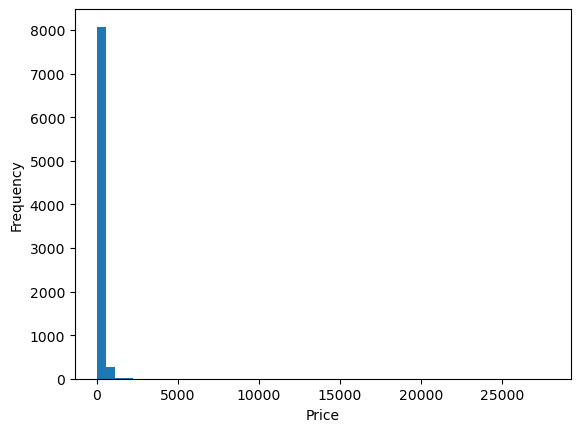

In [9]:
# Create a histogram of the 'price' column
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

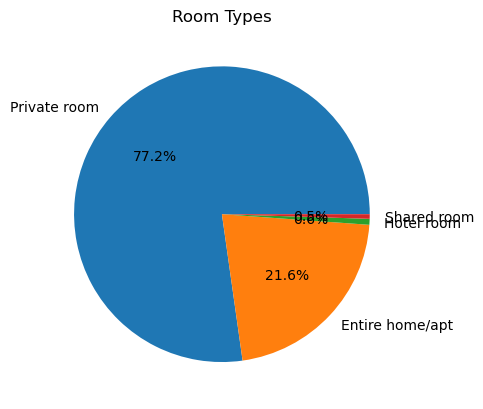

In [10]:
# Check the distribution of the 'room_type' column
plt.pie(df['room_type'].value_counts(), labels=df['room_type'].unique(), autopct='%1.1f%%')
plt.title('Room Types')
plt.show()

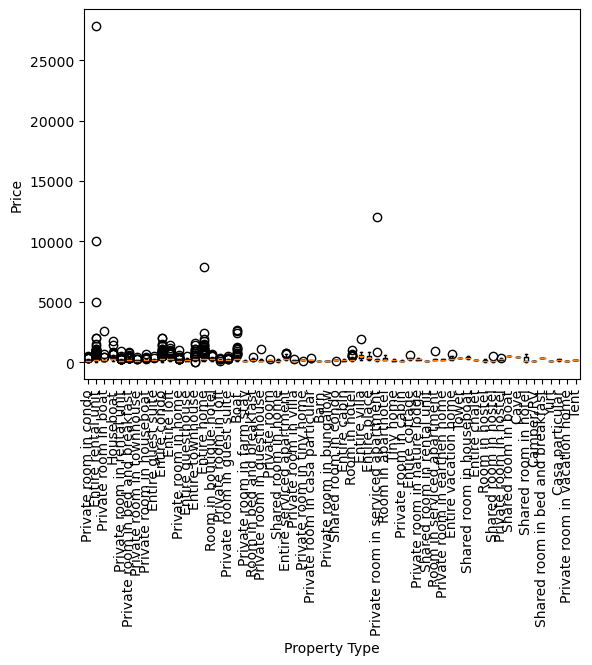

In [11]:
# Create a box plot of the 'price' column by property type
plt.boxplot([df[df['property_type'] == pt]['price'] for pt in df['property_type'].unique()])
plt.xticks(range(1, len(df['property_type'].unique()) + 1), df['property_type'].unique(), rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

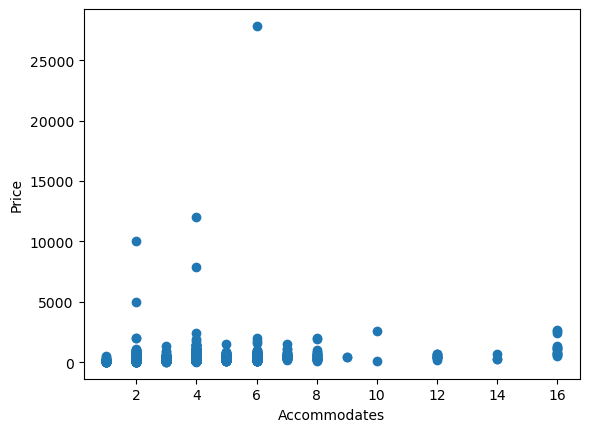

In [12]:
# Create a scatter plot of the 'price' column against the 'accommodates' column
plt.scatter(df['accommodates'], df['price'])
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()